Word Emedding 

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
#!pip install tensorflow==2.0.0

try:
  %tensorflow_version 2.x
except Exxception:
  pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

embedding_layers = layers.Embedding(1000,32)

TensorFlow is already loaded. Please restart the runtime to change versions.


Learn Embedding from the scratch

In [0]:
vocab_size = 10000
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

In [39]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Convert the integers back to words

In [40]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2   #Unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

Movie review can be of different lenght

In [0]:
maxlen = 500
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=maxlen)

In [19]:
print(train_data[0])

[  1  14  22  16  43 530 973   2   2  65 458   2  66   2   4 173  36 256
   5  25 100  43 838 112  50 670   2   9  35 480 284   5 150   4 172 112
 167   2 336 385  39   4 172   2   2  17 546  38  13 447   4 192  50  16
   6 147   2  19  14  22   4   2   2 469   4  22  71  87  12  16  43 530
  38  76  15  13   2   4  22  17 515  17  12  16 626  18   2   5  62 386
  12   8 316   8 106   5   4   2   2  16 480  66   2  33   4 130  12  16
  38 619   5  25 124  51  36 135  48  25   2  33   6  22  12 215  28  77
  52   5  14 407  16  82   2   8   4 107 117   2  15 256   4   2   7   2
   5 723  36  71  43 530 476  26 400 317  46   7   4   2   2  13 104  88
   4 381  15 297  98  32   2  56  26 141   6 194   2  18   4 226  22  21
 134 476  26 480   5 144  30   2  18  51  36  28 224  92  25 104   4 226
  65  16  38   2  88  12  16 283   5  16   2 113 103  32  15  16   2  19
 178  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

Create a simple model

In [42]:
embedding_dim=16
model = keras.Sequential([
                          layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


Compile and Train Model

In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    train_labels,
    epochs=30,
    batch_size=512,
    validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 1s 50us/sample - loss: 0.6921 - acc: 0.5621 - val_loss: 0.6892 - val_acc: 0.6000
Epoch 2/30
25000/25000 [==============================] - 1s 45us/sample - loss: 0.6818 - acc: 0.6760 - val_loss: 0.6727 - val_acc: 0.7422
Epoch 3/30
25000/25000 [==============================] - 1s 45us/sample - loss: 0.6542 - acc: 0.7503 - val_loss: 0.6372 - val_acc: 0.7673
Epoch 4/30
25000/25000 [==============================] - 1s 45us/sample - loss: 0.6056 - acc: 0.7895 - val_loss: 0.5858 - val_acc: 0.7847
Epoch 5/30
25000/25000 [==============================] - 1s 45us/sample - loss: 0.5434 - acc: 0.8165 - val_loss: 0.5264 - val_acc: 0.8160
Epoch 6/30
25000/25000 [==============================] - 1s 44us/sample - loss: 0.4794 - acc: 0.8418 - val_loss: 0.4714 - val_acc: 0.8348
Epoch 7/30
25000/25000 [==============================] - 1s 44us/sample - loss: 0.4232 - acc: 0.8622 - val_loss: 0.

Our model reaches accuracy of 88% then decreases, may be overfitting

Now plot the result

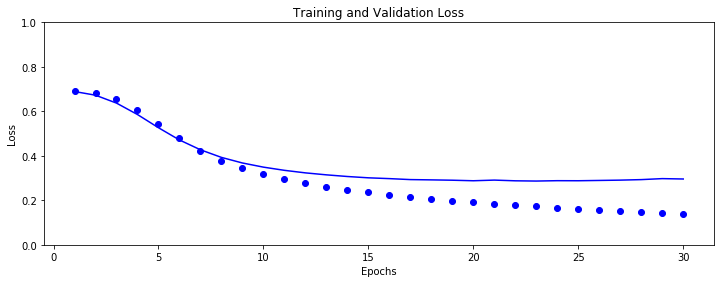

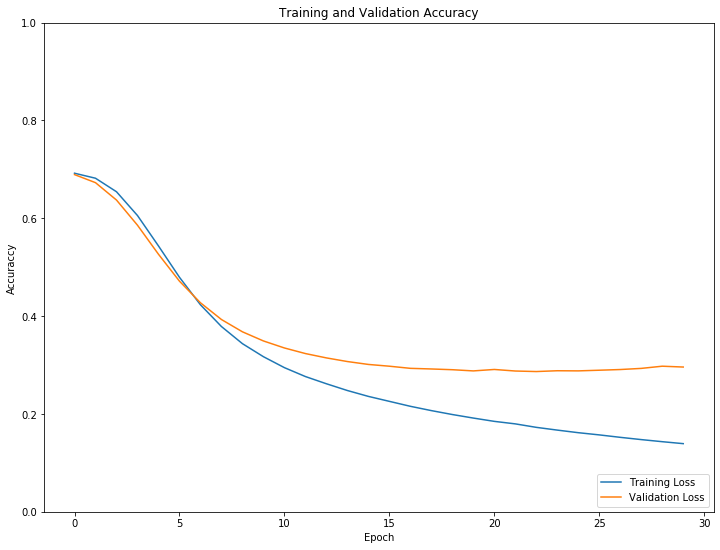

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history

acc = history_dict['acc'] #accuracy
val_acc = history_dict['val_acc']   #val_accuracy
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,9))
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.title('Training and Validation Loss')

plt.figure(figsize=(12,9))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuraccy')
plt.legend(loc='lower right')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.show()

Retrieve the learned embeddings

In [45]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)    #shape: (vocab_size, embedding_dim)

(10000, 16)


Write these weights to disks

In [0]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word+'\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

#############TypeError: NetworkError when attempting to fetch resource.##############

In [50]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

MessageError: ignored

Conclusion